In [33]:
from ryPat import *
import seaborn as sb
sb.set_theme()

Text(0, 0.5, 'f(x)')

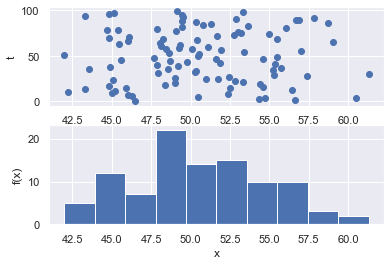

In [48]:
# Data Visualization
# Histogram

X= st.norm(loc= 50, scale= 5).rvs(size=100)

t= np.arange(X.size)

pl.subplot(2,1,1)
pl.scatter(X,t)
pl.xlabel('X')
pl.ylabel('t')

pl.subplot(2,1,2)
pl.hist(X, bins= 10)
pl.xlabel('x')
pl.ylabel('f(x)')


In [55]:
des= st.describe(X)
des

DescribeResult(nobs=100, minmax=(41.98192204868026, 61.31830888815212), mean=50.59228400066419, variance=18.793092379996068, skewness=0.19202533479950062, kurtosis=-0.5913060322843284)

In [57]:
des.mean, des.variance, des.skewness, des.kurtosis

In [63]:
st.mode(X), st.iqr(X)

(ModeResult(mode=array([41.98192205]), count=array([1])), 5.59412418485865)

In [68]:
#st.entropy?
st.entropy(X)

In [76]:
lr= st.linregress(t, X)
m= lr.slope
b= lr.intercept

x0= X.min()
x1= X.max()

t0= t[0]
t1= t[-1]

y0= m*t0+b
y1= m*t1+b

pl.scatter(t,X)
pl.plot([t0,t1],[y0,y1], 'r')

In [178]:
# Data Visualization
# Histogram

sampSize= 100
t= np.arange(sampSize)

# 你可以變換不同的機率分布來試試看

X= st.uniform(loc= 30, scale= 10).rvs(size= sampSize)
#X= st.norm(loc= 50, scale= 5).rvs(size= sampSize)
#X= st.gamma(a= 50, scale= 1).rvs(size= sampSize)

#X= st.randint(low= 30, high= 70).rvs(size= sampSize)
#X= st.binom(n= 100, p= .5).rvs(size= sampSize)
#X= st.poisson(mu= 30).rvs(size= sampSize)

#開始作圖，視覺化

fg, ax= pl.subplots(1,3)

# 隨機變數隨著時間軸 t 展開
ax[0].scatter(t,X)
ax[0].set_xlabel('t')
ax[0].set_ylabel('X')
ax[0].set_title('random variable, X(t)')

# 基本的 histogram
ax[1].hist(X, bins= 10, orientation= 'horizontal')
ax[1].set_xlabel('f(x)')
ax[1].set_ylabel('x')
ax[1].set_title('Histogram, f(x)')

# Linear regression
lr= st.linregress(t, X)
lr

# visualize the regression line
m= lr.slope
b= lr.intercept

x0= X.min()
x1= X.max()

t0= t[0]
t1= t[-1]

y0= m*t0+b
y1= m*t1+b


ax[0].plot([t0,t1],[y0,y1],'r')

# statistical description

des= st.describe(X)
des

## qq-plot

ax[2]= st.probplot(X, plot= pl)

In [161]:
%matplotlib qt

In [255]:
# 淺嚐 pandas
# 運用 yfinance 撈股票價格歷史資料

import pandas as pd
import yfinance as yf

# 選3支股票，世界前 3大。
tks= yf.Tickers(['MSFT', 'AAPL', 'Googl'])
tks
# 撈1年的資料
tkPrice= tks.history(period='max')

# 簡單作圖 X= X(t)
tkPrice.Close.plot(ylabel='$USD')
tkPrice.Close.plot(logy= True, ylabel='$USD')

# Histogram
tkPrice.Close.hist()
tkPrice.Close.hist(orientation= 'horizontal')

[*********************100%***********************]  3 of 3 completed


array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'GOOGL'}>],
       [<AxesSubplot:title={'center':'MSFT'}>, <AxesSubplot:>]],
      dtype=object)

In [262]:
#AAPL:  Shares Outstanding	16.41B
#MSFT:  Shares Outstanding	7.51B
#GOOGL&GOOG: Implied Shares Outstanding 663.76M

# 公司總市值，$TrillionUSD
X0= tkPrice.Close.AAPL.apply(lambda x:  x*16.41/1e3) 
X1= tkPrice.Close.MSFT.apply(lambda x:  x*7.51/1e3)
X2= tkPrice.Close.GOOGL.apply(lambda x: x*.66376/1e3)

X= pd.DataFrame([X0,X1,X2])
X= X.T
X.plot(ylabel='$TrillionUSD', 
       #logy= True, 
       title='Market Capital (in $TrillionUSD)')


<AxesSubplot:title={'center':'Market Capital (in $TrillionUSD)'}, xlabel='Date', ylabel='$TrillionUSD'>

In [238]:
tkPrice.Close.plot(logy= True, ylabel='$USD')

<AxesSubplot:xlabel='Date', ylabel='$USD'>

In [263]:
X.hist()

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'GOOGL'}>, <AxesSubplot:>]],
      dtype=object)

In [273]:
X.iloc[-500:].hist(orientation='horizontal')

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'GOOGL'}>, <AxesSubplot:>]],
      dtype=object)

Object `pd.hist` not found.


In [272]:
X.iloc[-500:].hist?

Docstring: Alias for `%history`.
File:      m:\programdata\anaconda3\lib\site-packages\ipython\core\magic.py


In [ ]:
X.iloc[-500:].hist

In [ ]:
X.iloc[-500:].hist

In [ ]:
X.iloc[-500:].hist

In [280]:
X.loc['2020-01':].describe()

,AAPL,MSFT,GOOGL
count,467.000000,467.000000,467.000000
mean,1.863368,1.688044,1.264168
std,0.445598,0.341904,0.354599
min,0.909158,1.002535,0.699689
25%,1.432051,1.457471,0.970351
50%,1.980640,1.617085,1.159755
75%,2.189548,1.912372,1.565110
max,2.567536,2.526664,1.976040


In [285]:
X.loc['2020-01':].hist(orientation='horizontal')

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'GOOGL'}>, <AxesSubplot:>]],
      dtype=object)

In [282]:
X.loc['2020-01':].plot()

<AxesSubplot:xlabel='Date'>

In [286]:
2.523/336.06 #= 0.007508 Trillion 股

In [342]:
#
# Top10 Companies
#
top10= {
    'MSFT':    'Microsoft',
    'AAPL':    'Apple',
    #'2222.SR': 'Saudi Aramco',
    'GOOG':    'Alphabet (Google)',
    'AMZN':    'Amazon',
    'TSLA':    'Tesla',
    'FB':      'Meta (Facebook)',
    'NVDA':    'NVIDIA',
    'BRK-A':   'Berkshire Hathaway',
    'TSM':     'TSMC',
    'TCEHY':   'Tencent',
    #'JPM':     'JPMorgan Chase'
    }


In [343]:
top10L= list(top10.keys())
top10L

['MSFT', 'AAPL', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NVDA', 'BRK-A', 'TSM', 'TCEHY']

In [344]:
tks= yf.Tickers(top10L)
X= tks.history(period='max')
X.Close.plot(logy=True)

[*********************100%***********************]  10 of 10 completed


<AxesSubplot:xlabel='Date'>

In [352]:
top10Stocks= [
    (2.52E+03,  336.06),
    (2.49E+03,  151.28),
    #(2.02E+03, 10.09), 
    (1.95E+03,  2985), 
    (1.78E+03,  3519), 
    (1.23E+03,  1222), 
    (936.98	,   341.13), 
    (741.41	,   297.52), 
    (655.23	,   434000), 
    (610.91	,   117.80), 
    (562.82	,   58.59), 
    #(503.24,   168.05), 
    ]

#top10Stocks= np.array(top10Stocks)[:,-1]*1e-3 # unit= Trillion
#top10Stocks

top10Stocks= np.array(top10Stocks)[:,0]/ np.array(top10Stocks)[:,1]/1e3 # unit= Trillion
top10Stocks

array([7.49866095e-03, 1.64595452e-02, 6.53266332e-04, 5.05825519e-04,
       1.00654664e-03, 2.74669481e-03, 2.49196693e-03, 1.50974654e-06,
       5.18599321e-03, 9.60607612e-03])

In [355]:
Y= X.Close.loc[:,top10L]*top10Stocks
Y.plot(#logy=True, 
       title= 'Top10 largest Companies, Market Cap',
       ylabel= 'Trillion ($10^{12}$) Dallars')

<AxesSubplot:title={'center':'Top10 largest Companies, Market Cap'}, xlabel='Date', ylabel='Trillion ($10^{12}$) Dallars'>

In [356]:
Y.loc['2017-01-01':].describe()

,MSFT,AAPL,GOOG,AMZN,TSLA,FB,NVDA,BRK-A,TSM,TCEHY
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,1.096055,1.163244,0.912973,1.033537,0.227127,0.575251,0.198605,0.477644,0.296904,0.500273
std,0.533215,0.630923,0.354277,0.433114,0.268613,0.173931,0.134689,0.075416,0.167054,0.148727
min,0.435156,0.449377,0.513559,0.381226,0.036028,0.320979,0.058797,0.359471,0.130471,0.231927
25%,0.670665,0.677978,0.687197,0.747620,0.059962,0.456940,0.103779,0.428391,0.180442,0.401158
50%,0.962171,0.844927,0.776087,0.920026,0.069470,0.509979,0.146338,0.464700,0.207672,0.469193
75%,1.544407,1.825916,0.991658,1.558281,0.375160,0.699913,0.302143,0.503032,0.403191,0.589045
max,2.522850,2.575288,1.949882,1.887442,1.237962,1.049732,0.742631,0.663473,0.717859,0.949422


In [357]:
Y.loc['2017-01-01':].hist(orientation='horizontal')

array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'GOOG'}>],
       [<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'TSLA'}>,
        <AxesSubplot:title={'center':'FB'}>],
       [<AxesSubplot:title={'center':'NVDA'}>,
        <AxesSubplot:title={'center':'BRK-A'}>,
        <AxesSubplot:title={'center':'TSM'}>],
       [<AxesSubplot:title={'center':'TCEHY'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)